In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

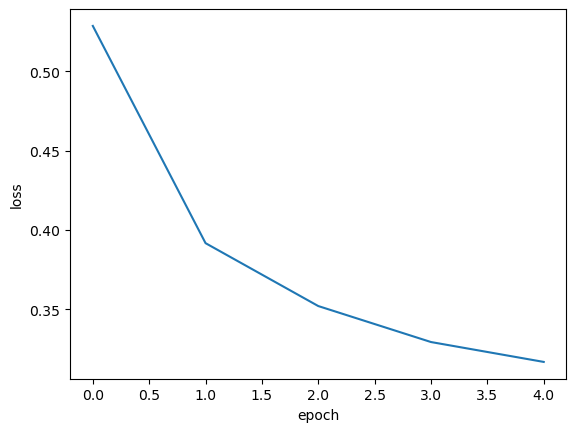

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

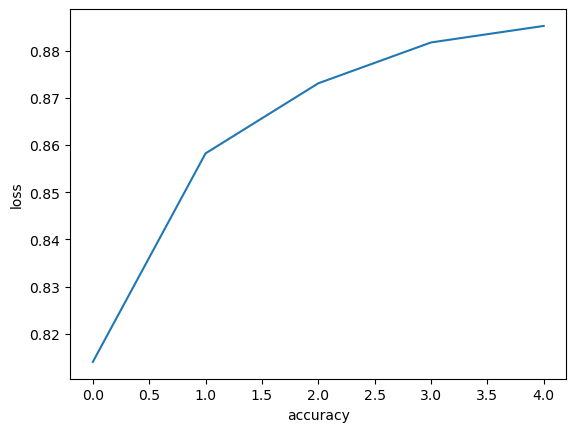

In [11]:

plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.show()

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
history.history.keys()

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5314 - accuracy: 0.8120 - val_loss: 0.4569 - val_accuracy: 0.8338
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3924 - accuracy: 0.8582 - val_loss: 0.3945 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3511 - accuracy: 0.8723 - val_loss: 0.3545 - val_accuracy: 0.8732
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3309 - accuracy: 0.8806 - val_loss: 0.3593 - val_accuracy: 0.8733
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3132 - accuracy: 0.8870 - val_loss: 0.3712 - val_accuracy: 0.8722
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3027 - accuracy: 0.8909 - val_loss: 0.3442 - val_accuracy: 0.8824
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8954 - val_loss: 0.3679 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

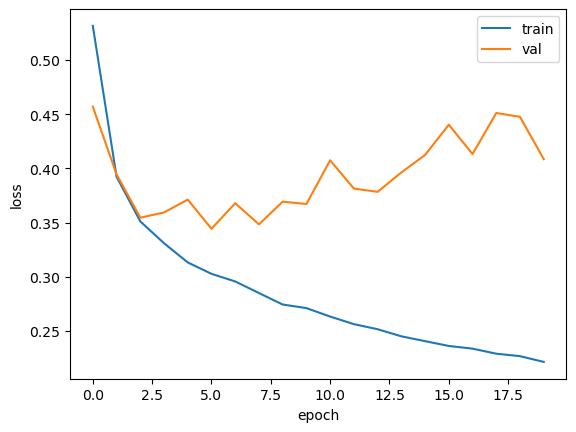

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5268 - accuracy: 0.8159 - val_loss: 0.4300 - val_accuracy: 0.8495
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3957 - accuracy: 0.8587 - val_loss: 0.4046 - val_accuracy: 0.8558
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3559 - accuracy: 0.8720 - val_loss: 0.3787 - val_accuracy: 0.8619
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3269 - accuracy: 0.8810 - val_loss: 0.3445 - val_accuracy: 0.8765
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3079 - accuracy: 0.8873 - val_loss: 0.3537 - val_accuracy: 0.8748
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2898 - accuracy: 0.8936 - val_loss: 0.3716 - val_accuracy: 0.8604
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2787 - accuracy: 0.8976 - val_loss: 0.3244 - val_accuracy:

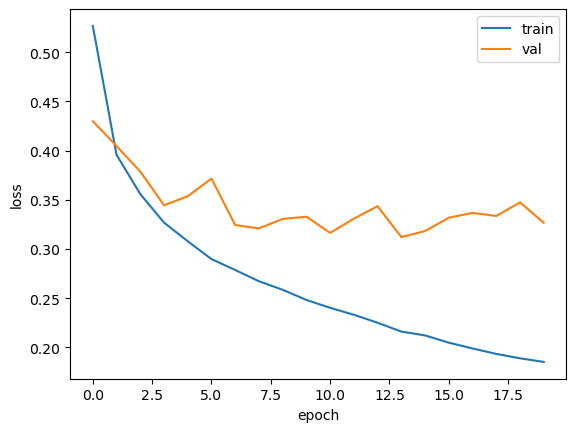

In [15]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5907 - accuracy: 0.7930 - val_loss: 0.4162 - val_accuracy: 0.8511
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4349 - accuracy: 0.8429 - val_loss: 0.3871 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4033 - accuracy: 0.8531 - val_loss: 0.3599 - val_accuracy: 0.8683
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8608 - val_loss: 0.3560 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3666 - accuracy: 0.8646 - val_loss: 0.3581 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3537 - accuracy: 0.8694 - val_loss: 0.3371 - val_accuracy: 0.8785
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3435 - accuracy: 0.8742 - val_loss: 0.3333 - val_accuracy:

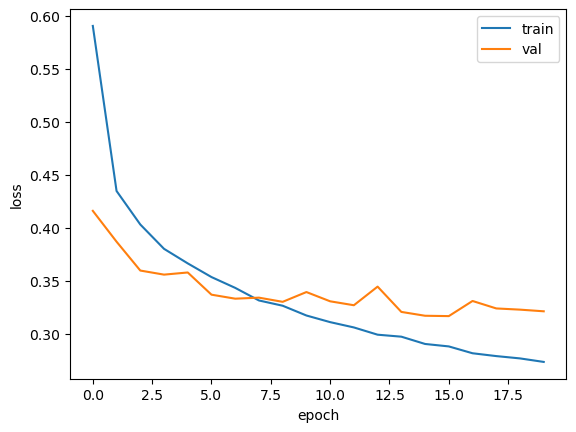

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2715 - accuracy: 0.8971 - val_loss: 0.3258 - val_accuracy: 0.8849
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2676 - accuracy: 0.8999 - val_loss: 0.3341 - val_accuracy: 0.8821
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2653 - accuracy: 0.8998 - val_loss: 0.3337 - val_accuracy: 0.8859
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2604 - accuracy: 0.9013 - val_loss: 0.3214 - val_accuracy: 0.8892
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2578 - accuracy: 0.9026 - val_loss: 0.3264 - val_accuracy: 0.8904
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2543 - accuracy: 0.9039 - val_loss: 0.3158 - val_accuracy: 0.8923
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2564 - accuracy: 0.9020 - val_loss: 0.3271 - val_accuracy:

In [20]:
model.save_weights('model-weight.h5')
model.save('model-whole.h5')

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
!ls -al *.h

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

In [23]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8901666666666667

In [24]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3208 - accuracy: 0.8902


[0.32079455256462097, 0.8901666402816772]